In [4]:
import numpy as np
import pickle
import sys
import os
import matplotlib.pyplot as plt

In [5]:
aggregated_awd_wikisum = "../../transformed_attention_weights/wikisum"
aggregated_awd_multinews = "../../transformed_attention_weights/multinews"

In [6]:
wikisum_result_dict = pickle.load(open(os.path.join(aggregated_awd_wikisum,"result_dict"),"rb"))

wikisum_cleaned_weight_matrix = np.load(os.path.join(aggregated_awd_wikisum, "cleaned_weight_matrix.npy"))

In [3]:



multinews_result_dict = pickle.load(open(os.path.join(aggregated_awd_multinews,"result_dict"),"rb"))

multinews_cleaned_weight_matrix = np.load(os.path.join(aggregated_awd_multinews, "cleaned_weight_matrix.npy"))

In [8]:
def prepare_input(input_matrix, meta_information):
    
    decoding_layers = [[] for i in range(8)]
    
    multi_heads = [[] for i in range(8)]
    
    num_examples = input_matrix.shape[0]
    
    for idx in range(num_examples):
        beam_length = meta_information[idx][0]
        
        
        ex = input_matrix[idx,0,:int(beam_length-1),:,:,:]
              
       
        
        for j in range(8):
            decoding_layers[j].extend(ex[:,j,:,:].reshape(-1,))
            multi_heads[j].extend(ex[:,:,j,:].reshape(-1,))
            
    return decoding_layers, multi_heads
        
        

In [9]:
def calculate_correlation(multi_heads, decoding_layers):    
        
    multi_head_corr = np.corrcoef(multi_heads)
    
    decoding_layers_corr = np.corrcoef(decoding_layers)
    
    print(f"Multi-Head: mean {np.mean(multi_head_corr)} | min {np.min(multi_head_corr)} ")
    
    plt.figure()
    plt.imshow(multi_head_corr)
    plt.colorbar()
    plt.savefig("multi_head_corr.pdf")
    plt.show()
    
    print(f"Decoding-Layer: mean {np.mean(decoding_layers_corr)} | min {np.min(decoding_layers_corr)} ")
    
    plt.figure()
    plt.imshow(decoding_layers_corr)
    plt.colorbar()
    plt.savefig("decoding_layer_corr.pdf")
    plt.show()
    
    

    
    return multi_head_corr, decoding_layers_corr
    
    

In [10]:
wikisum_token_decoding,wikisum_token_multi_head  = prepare_input(wikisum_cleaned_weight_matrix[:,0,:,:,:,:][:,None,:,:,:,:], wikisum_result_dict["beam_length"][:,0][:,None])

In [6]:
multi_news_token_decoding,multi_news_token_multi_head  = prepare_input(multinews_cleaned_weight_matrix[:,0,:,:,:,:][:,None,:,:,:,:], multinews_result_dict["beam_length"][:,0][:,None])



Multi-Head: mean 0.7182698501037554 | min 0.4910394129130611 


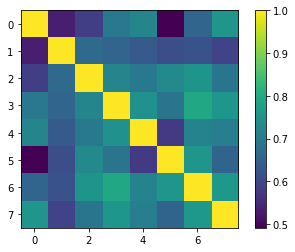

Decoding-Layer: mean 0.5379603462671958 | min 0.24642496701856906 


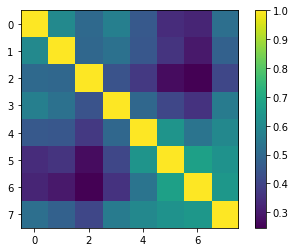

In [7]:
m_t_m,m_t_d = calculate_correlation(multi_news_token_multi_head, multi_news_token_decoding)

Multi-Head: mean 0.7192955274934009 | min 0.4911719322340138 


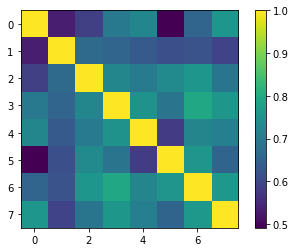

Decoding-Layer: mean 0.5365844539681838 | min 0.2439005529791923 


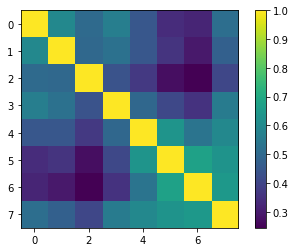

In [28]:
m_t_m,m_t_d = calculate_correlation(multi_news_token_multi_head, multi_news_token_decoding)

Multi-Head: mean 0.5094964247816923 | min 0.259670367432464 


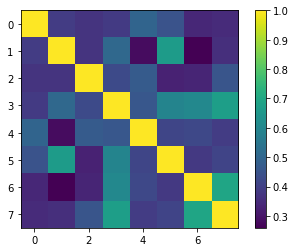

Decoding-Layer: mean 0.4095033149937196 | min 0.1643861401356916 


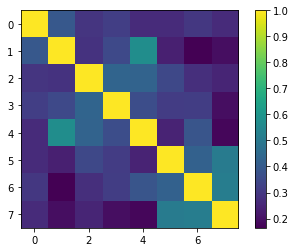

In [11]:
w_t_m,w_t_d = calculate_correlation(wikisum_token_multi_head, wikisum_token_decoding)